In [2]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler

df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

numeric_columns = df_market_data.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)


In [7]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
scaled_df = pd.DataFrame(scaled_data, index=df_market_data.index, columns=numeric_columns.columns)


# Display sample data
scaled_df.head(5)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [8]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


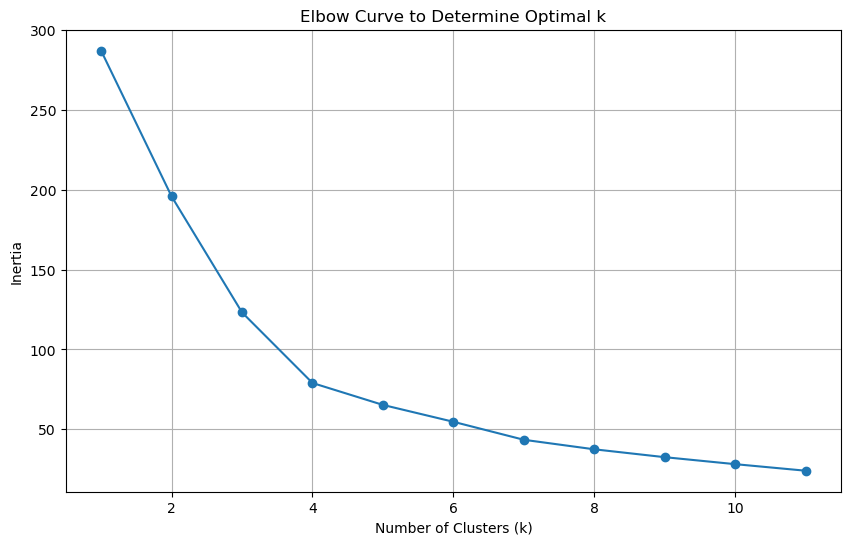

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of k values (1 to 11)
k_values = list(range(1, 12))

# Create an empty list to store inertia values
inertia_values = []

# Iterate over each k value to compute inertia
for k in k_values:
    # Create a KMeans model for each k with n_init explicitly set to avoid warnings
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Fit the model to the scaled data
    model.fit(scaled_df)
    
    # Append the inertia of the model to the inertia_values list
    inertia_values.append(model.inertia_)

# Plot a line chart with the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve to Determine Optimal k')
plt.grid(True)
plt.show()



In [10]:

# Step 1: Create a dictionary with the data to plot the Elbow curve
elbow_data = {
        'k': k_values,
        'inertia': inertia_values
    }

# Step 1: Create a dictionary with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
    
print(elbow_df.head())



   k     inertia
0  1  287.000000
1  2  195.820218
2  3  123.190482
3  4   79.022435
4  5   65.302379


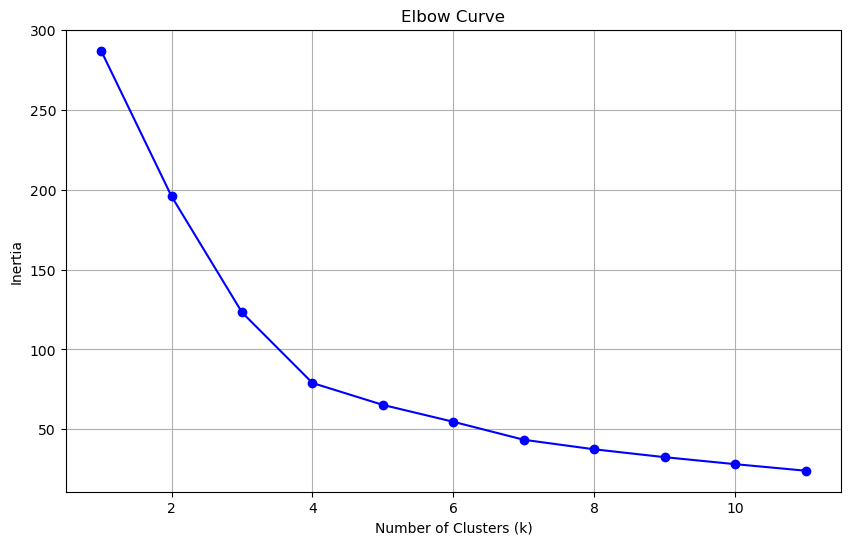

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot a line chart with the inertia values computed with the different values of k
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')

plt.grid(True)

plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

k = 4 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [12]:
# Initialize the K-Means model using the best value for k
best_k = 4

kmeans_model = KMeans(n_clusters=best_k, random_state=42)


In [13]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_df)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions = kmeans_model.predict(scaled_df)

# Print the resulting array of cluster values.
print("Cluster Predictions:\n", cluster_predictions)

Cluster Predictions:
 [0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [15]:
# Create a copy of the DataFrame
df_market_copy = df_market_data.copy()

print(df_market_copy)


                      price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                   1.08388                     7.60278   
ethereum                                  0.22392                    10.38134   
tether                                   -0.21173                     0.04935   
ripple                                   -0.37819                    -0.60926   
bitcoin-cash                              2.90585                    17.09717   
binancecoin                               2.10423                    12.85511   
chainlink                                -0.23935                    20.69459   
cardano                                   0.00322                    13.99302   
litecoin                                 -0.06341                     6.60221   
bitcoin-cash-sv                           0.92530                     3.29641   
crypto-com-chain            

In [16]:
# Add a new column to the DataFrame with the predicted clusters
df_market_copy['Cluster'] = cluster_predictions

# Display sample data
print(df_market_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [17]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

import hvplot.pandas 


scatter_plot = df_market_copy.hvplot.scatter(
    x='price_change_percentage_24h',  
    y='price_change_percentage_7d',   
    c='Cluster',                      
    hover_cols=['coin_name'],         
    title='Cryptocurrency Clusters',  
    xlabel='24h Price Change (%)',    
    ylabel='7d Price Change (%)',     
    size=100,                         
    alpha=0.7                         
)

# Display the plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

In [23]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_transformed_data = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(pca_transformed_data, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame. 
print(pca_df.head())


        PC1       PC2       PC3
0 -0.600667  0.842760  0.461595
1 -0.458261  0.458466  0.952877
2 -0.433070 -0.168126 -0.641752
3 -0.471835 -0.222660 -0.479053
4 -1.157800  2.041209  1.859715


In [24]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.

explained_variance_ratio = pca.explained_variance_ratio_

print("Explained Variance Ratio for each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"PC{i}: {ratio:.4f}")



Explained Variance Ratio for each Principal Component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

1 is the total explained variance.

In [31]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pca_transformed_data, index=df_market_data.index, columns=['PC1', 'PC2', 'PC3'])

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data

# Set the coinid column as index


# Display sample data
print(pca_df.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [33]:
# Create a list with the number of k-values from 1 to 11
k_values_list = list(range(1, 12))

print(k_values_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [35]:

# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values_list:

# Inside the loop:

# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

# 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(pca_df)


# 3. Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans.inertia_)

print(inertia_values_pca)


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

[256.8740855678923, 165.90199402036, 93.77462568057292, 49.66549665179733, 37.8394659868124, 30.777746141441167, 21.13405603747359, 17.091636643864735, 13.681139692992737, 10.630647573870952, 8.12862032021349]


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    'k': k_values_list,            
    'inertia': inertia_values_pca  
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

print(elbow_df_pca.head())


   k     inertia
0  1  256.874086
1  2  165.901994
2  3   93.774626
3  4   49.665497
4  5   37.839466


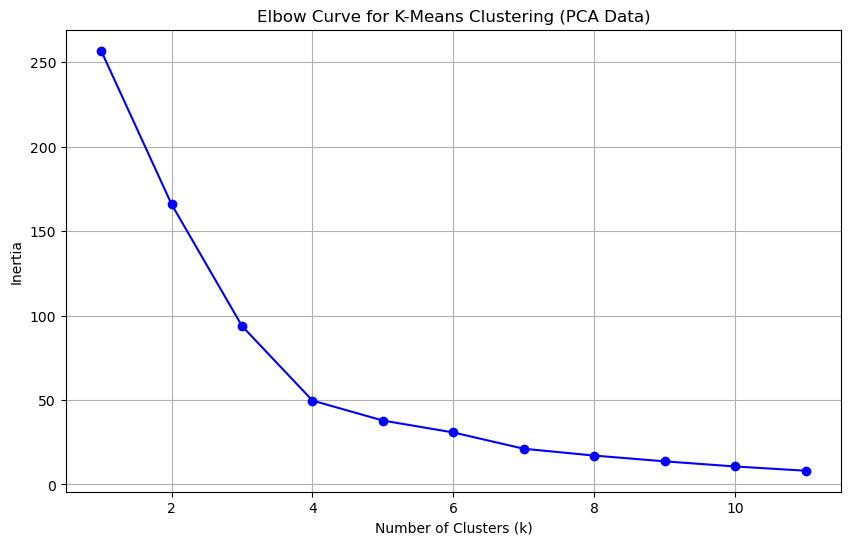

In [37]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'], marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-Means Clustering (PCA Data)')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
k = 4

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
  no, it still looks the same

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [38]:
# Initialize the K-Means model using the best value for k
kmeans_best = KMeans(n_clusters=best_k, random_state=42)


In [39]:
# Fit the K-Means model using the PCA data
kmeans_best.fit(pca_df)

print(kmeans_best)

KMeans(n_clusters=4, random_state=42)


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_predictions_pca = kmeans_best.predict(pca_df)

# Print the resulting array of cluster values.
print(cluster_predictions_pca)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [41]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['Cluster'] = cluster_predictions_pca

# Display sample data
print(df_pca_copy.head())


                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        0


In [42]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_pca_copy['coin_id'] = df_market_data.index

scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',  # Color points by cluster labels
    cmap='viridis',  # Colormap for clusters
    hover_cols=['coin_id'],  # Show crypto name on hover
    title='PCA Scatter Plot of Cryptocurrencies',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2'
)

scatter_plot


:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

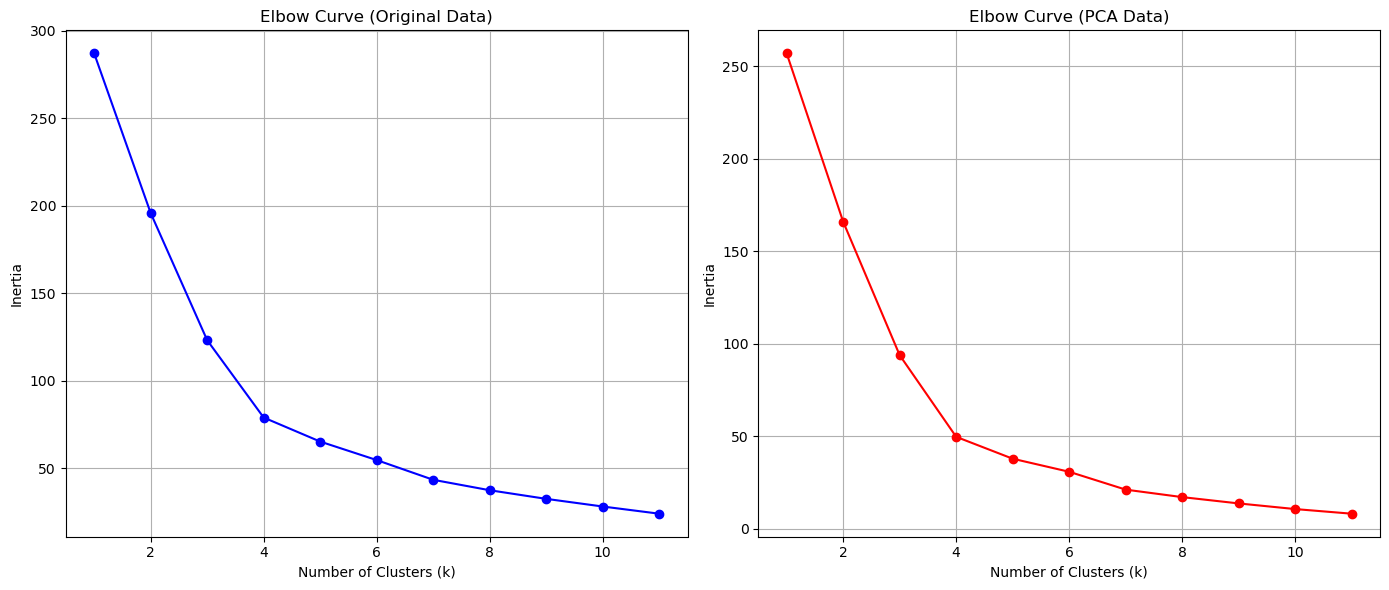

In [44]:
# Composite plot to contrast the Elbow curves
inertia_values_original = inertia_values

inertia_values_pca = inertia_values_pca  

k_values_list = list(range(1, 12))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the Elbow curve for the original data
axs[0].plot(k_values_list, inertia_values_original, marker='o', linestyle='-', color='blue')
axs[0].set_title('Elbow Curve (Original Data)')
axs[0].set_xlabel('Number of Clusters (k)')
axs[0].set_ylabel('Inertia')
axs[0].grid(True)

# Plot the Elbow curve for the PCA data
axs[1].plot(k_values_list, inertia_values_pca, marker='o', linestyle='-', color='red')
axs[1].set_title('Elbow Curve (PCA Data)')
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('Inertia')
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the composite plot
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
  Using fewer features allows interpretability and simplifies the data. It's extremely useful and beneficial for validating data. 